In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from requests import head
df = pd.read_csv('results.csv', header=None)

In [3]:
df

,0,1,2,3,4,5
0,0,ESOL,structural,expected_improvement,GCN,"[-2.617000102996826, -2.617000102996826, -2.61..."
1,0,ESOL,parametric,expected_improvement,GCN,"[-3.2699999809265137, -0.699999988079071, -0.4..."
2,0,ESOL,parametric,probability_of_improvement,GCN,"[-2.7300000190734863, -2.7300000190734863, -2...."
3,0,FreeSolv,parametric,probability_of_improvement,GCN,"[-5.03000020980835, -4.210000038146973, -4.210..."
4,0,FreeSolv,structural,expected_improvement,GCN,"[0.25, 0.25, 0.25, 0.3400000035762787, 2.48000..."
5,0,Lipophilicity,structural,expected_improvement,GCN,"[0.6899999976158142, 0.7799999713897705, 2.230..."
6,0,Lipophilicity,structural,probability_of_improvement,GCN,"[1.8799999952316284, 2.680000066757202, 3.2999..."
7,0,FreeSolv,structural,probability_of_improvement,GCN,"[-0.6299999952316284, 0.14000000059604645, 0.1..."
8,0,Lipophilicity,parametric,expected_improvement,GCN,"[2.630000114440918, 3.799999952316284, 3.79999..."
9,0,Lipophilicity,parametric,probability_of_improvement,GCN,"[3.2799999713897705, 3.2799999713897705, 3.5, ..."


In [16]:
def get_result(df, data, strategy, acquisition, layer):
    df = df[(df[1] == data) & (df[2] == strategy) & (df[3] == acquisition) & (df[4] == layer)][5].values
    if len(df) == 0:
        return None
    df = eval(df.tolist()[0])
    return df

In [17]:
array = get_result(df, "ESOL", "parametric", "expected_improvement", "GCN")

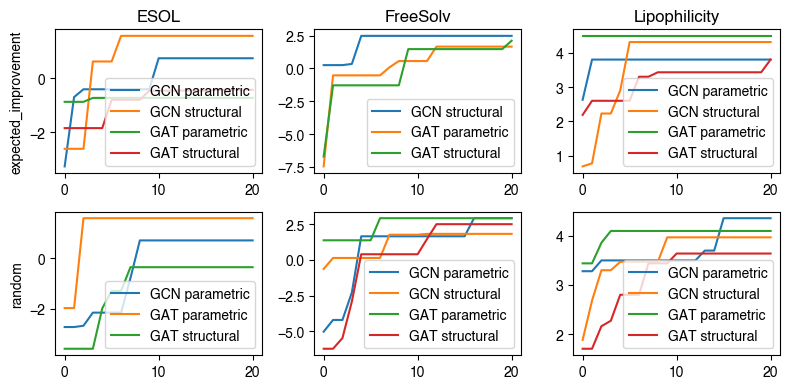

In [27]:
# set the default font to be Helvetica
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'



fig, axs = plt.subplots(2, 3, figsize=(8, 4))
for idx_data, data in enumerate(["ESOL", "FreeSolv", "Lipophilicity"]):
    for idx_acquisition, acquisition in enumerate(["expected_improvement", "probability_of_improvement"]):
        ax = axs[idx_acquisition, idx_data]
        for idx_layer, layer in enumerate(["GCN", "GAT", "GIN"]):
            for idx_strategy, strategy in enumerate(["parametric", "structural"]):
                array = get_result(df, data, strategy, acquisition, layer)
                if array is not None:
                    ax.plot(array, label=f"{layer} {strategy}")
                    ax.legend()

for idx_acquisition, acquisition in enumerate(["expected_improvement", "random"]):
    axs[idx_acquisition, 0].set_ylabel(acquisition)

for idx_data, data in enumerate(["ESOL", "FreeSolv", "Lipophilicity"]):
    axs[0, idx_data].set_title(data)

plt.tight_layout()